## Source of inspiration

[HF news of the week early october](/posts/2022-10-01-logbook-October-22.html#friday-107)

There is a new version of [Gradio](https://github.com/gradio-app/gradio/releases/tag/v3.4) announced. Have to try it.

These apps can then be hosted on huggingface. Let's try that.


## How to do it

I have a small need that gradio could fit perfectly.

I am in the board of a badminton club. We have list of members given by one source. And updated rankings given by another source (these rankings can evolve during the year, actually after each game)




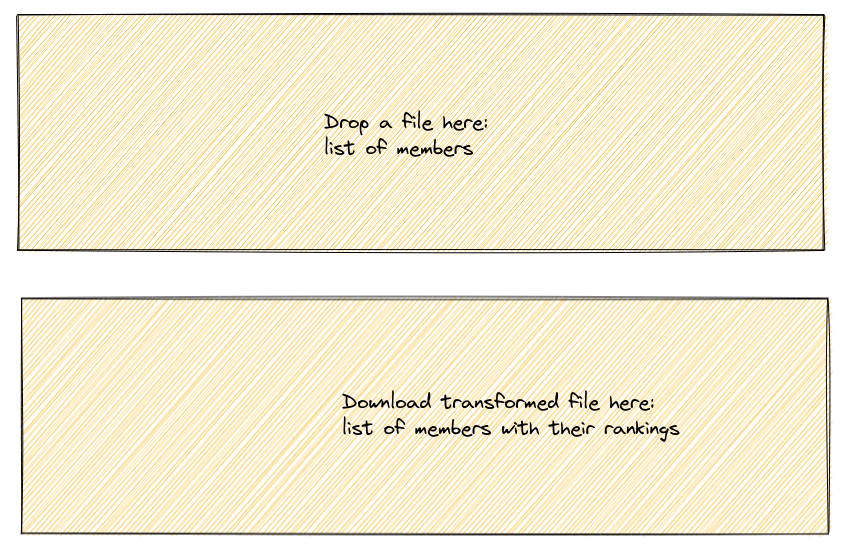

This project is in [gh rbc](https://github.com/castorfou/rbc)

### Get rankings

Rankings are taken from badmania website at https://badmania.fr/club-joueurs-2254-riom-badminton-club.html

It is as easy as:

In [1]:
import pandas as pd
pd.read_html('https://badmania.fr/club-joueurs-2254-riom-badminton-club.html')[0].head()

,Nom ▼▲,Nom ▼▲.1,Prénom ▼▲,Prénom ▼▲.1,Sexe,Licence,Catégorie ▼▲,Classement ▼▲,Class.
0,ANDRAL,Anthony,ANDRAL,Anthony,NaN,7354056,Senior,P11/P10/P10,P11/P10/P10
1,AVARGUEZ,Eric,AVARGUEZ,Eric,NaN,6630518,Veteran 6,P11/D9/P10,P11/D9/P10
2,BARBIER DARDARE,Léna,BARBIER...,Léna,NaN,7454028,Minibad,-/-/-,-/-/-
3,BARDEL,Damien,BARDEL,Damien,NaN,7250210,Veteran 1,P12/P12/P11,P12/P12/P11
4,BARRAUD,Ines,BARRAUD,Ines,NaN,7354562,NaN,-/-/-,-/-/-


Because list of members provide 'Licence' column (License), it is easy to link the 2 files together

Everything is under [update_classement.ipynb](https://github.com/castorfou/rbc/blob/main/update_classement.ipynb):
* `get_classement` to extract ranking from a given license
* `add_classements` to add all the ranking to the members list (using ` apply(lambda x: get_classement(x))`

### Export rankings function with nbdev

Here I am using the basic export function from [nbdev2](/blog/posts/2022-09-12-nbdev2.html).

#### declare filename to export to

Just by inserting

```python
#|default_exp rbc
``` 

at the top of notebook. It means it will export `rbc.py`

#### declare what to export

This is the standard way using quarto directives.

Just by inserting

```python
#| export
``` 

in front of each cell of interest

#### declare where to export, and export

At the bottom of notebook.

```python
#| hide

import nbdev; nbdev.export.nb_export('update_classement.ipynb', lib_path='.')
```

It creates `rbc.py` in the same directory as 'update_classement.ipynb'. (lib_path)

### Create gradio interface

#### Here is a small example.

In [3]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!"

demo = gr.Interface(
    fn=greet,
    inputs=gr.Textbox(lines=2, placeholder="Name Here..."),
    outputs="text",
)
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f7532f50280>, 'http://127.0.0.1:7860/', None)

#### Our interface 

Everything is in [main.ipynb](https://github.com/castorfou/rbc/blob/main/main.ipynb)

Quite simple, the gradio interface as Blocks,

with 2 file zones, one button and one action (click to send file content to a function `analyse_fichier`)

`analyse_fichier` which takes the file, use `add_classements` from `rbc`, save the new content in a temporary file, and return it as the 2nd file block output.

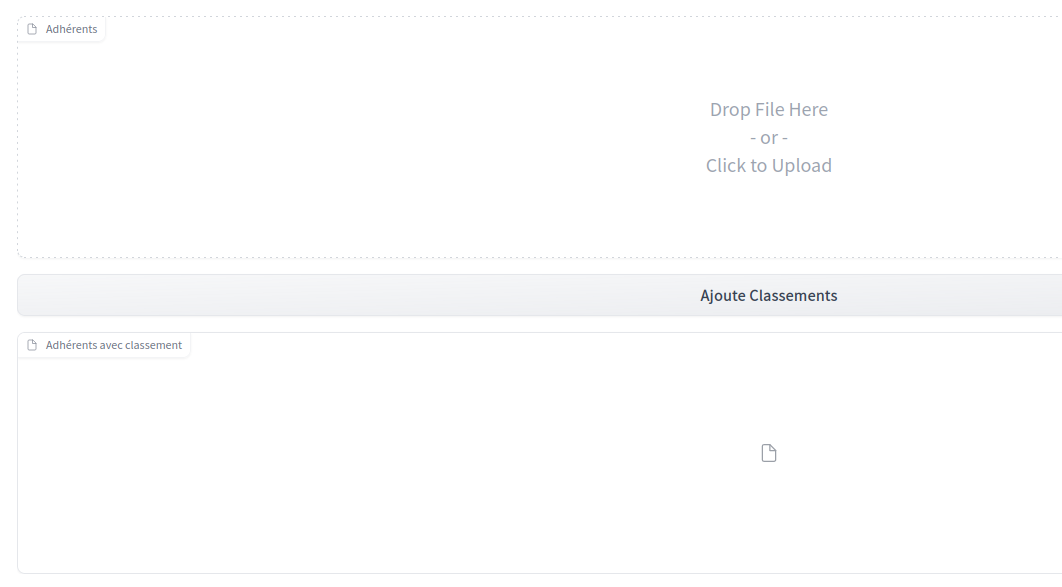

#### export to `main.py`

This is the same logic as earlier.

- declare export name with `#|default_exp app`
- declare cells to export with `#| export`
- export from main.ipynb to main.py with `import nbdev; nbdev.export.nb_export('main.ipynb', lib_path='.')`

Just by launching `Restart kernel and run all cells`, everything is run smoothly and `main.py` is created

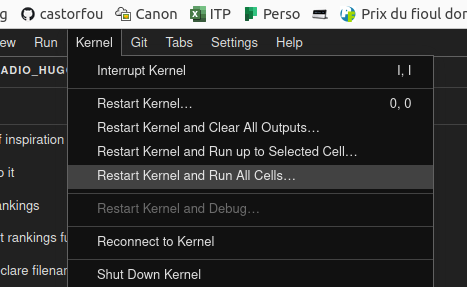

### Publish to huggingface

We publish to Spaces in [huggingface](https://huggingface.co)

You need an huggingface account. And created a space which is almost like creating a git repo.


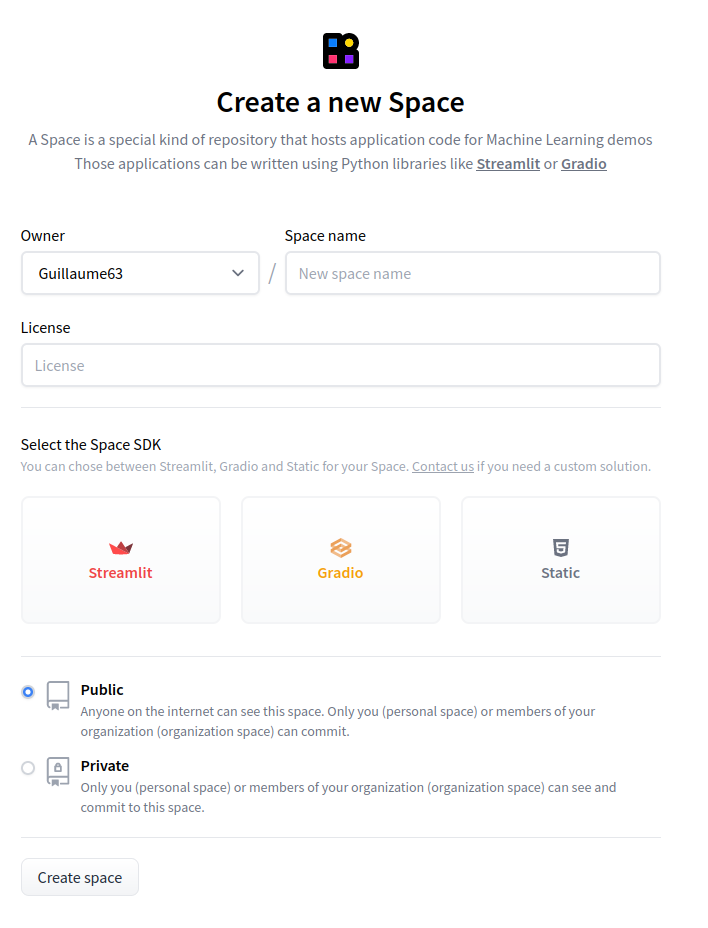

Then you can drag and drop main.py or git push to this location. This last option is what I used.

I have just created a new space called rbc at `https://huggingface.co/spaces/Guillaume63/rbc`


I can now git clone this repo to a folder aside my current project (I used `rbc_hugginface`)

```bash
cd ~/git
git clone https://huggingface.co/spaces/Guillaume63/rbc rbc_huggingface
```

I can now copy these files to it, git add, commit, push, and voila
- requirements.txt
- app.py
- main.py





I have stored that in the `pubglish_to_hf.sh` bash script
```bash
#!/bin/bash
# git clone https://huggingface.co/spaces/Guillaume63/rbc rbc_huggingface
NOW=`date '+%F_%H:%M'`;
cp *.py ../rbc_huggingface
cp requirements.txt ../rbc_huggingface
cd ../rbc_huggingface
git add .
git commit -am"$NOW"
git push
cd ../rbc
```

Demo recorded with peek (`peek -b ffmpeg`)

![](/images/gradio_huggingface.gif)

#### TODO using gh actions

A nicer approach would be to use github actions to publish to huggingface.

At each commit on github, actions would run to commit our 3 files to huggingface.

https://huggingface.co/docs/hub/spaces-github-actions